In [7]:
import sys

!{sys.executable} -m pip install --force-reinstall '../dist/dataset_augmenter-0.0.1-py3-none-any.whl'
!{sys.executable} -m pip install  --force-reinstall '../../cogent-number-generator/dist/number_generator-0.0.1-py3-none-any.whl'

Processing /Users/pablocael/Documents/cogent-dataset-augmenter/dist/dataset_augmenter-0.0.1-py3-none-any.whl
  Using cached numpy-1.21.2-cp39-cp39-macosx_10_9_x86_64.whl (17.0 MB)
  Using cached pytest-6.2.5-py3-none-any.whl (280 kB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached stsci.ndimage-0.10.3-cp39-cp39-macosx_11_0_x86_64.whl
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached py-1.10.0-py2.py3-none-any.whl (97 kB)
  Using cached pluggy-1.0.0-py2.py3-none-any.whl (13 kB)
  Using cached packaging-21.0-py3-none-any.whl (40 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
  Attempting uninstall: toml
    Found existing installation: toml 0.10.2


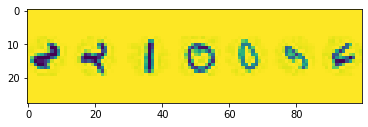

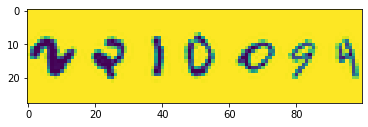

In [6]:
from dataset_augmenter.core import DataTransformerPipeline
from number_generator.core import DigitImageDataset, set_default_dataset_filepath
from number_generator import generate_numbers_sequence
import matplotlib.pyplot as plt

output_augmented_dataset_filepath = './augmented_dataset.pickle'

dataset = DigitImageDataset()
dataset.load('../../cogent-number-generator/data/digits-dataset.pickle')

images, labels = dataset.get_data()

pipeline = DataTransformerPipeline()
pipeline.add_gaussian_noise_transformer(sigma=0.05)
pipeline.add_rotation_transformer(min_angle=-50, max_angle=50)

new_images, new_labels = pipeline.sample_and_perform_transformation(sample_size=2000, X=images, Y=labels)

new_dataset = DigitImageDataset(new_images, new_labels)
new_dataset.save(output_augmented_dataset_filepath)

# configure number_generator to use the new augmented dataset
set_default_dataset_filepath(output_augmented_dataset_filepath)

# generate a number sequence using the new augmented dataset
image = generate_numbers_sequence([2,2,1,0,0,9,4], spacing_range=(5,10), image_width=100)

# show the new image
plt.imshow(image)
plt.show()

# now rotate and elastic deform
pipeline = DataTransformerPipeline()
pipeline.add_elastic_transformer(intensity=3, sigma=4)
pipeline.add_rotation_transformer(min_angle=-50, max_angle=50)

new_images, new_labels = pipeline.sample_and_perform_transformation(sample_size=2000, X=images, Y=labels)

# create a new dataset with augmented data
new_dataset = DigitImageDataset(new_images, new_labels)
new_dataset.save(output_augmented_dataset_filepath)

# alternativelly, we could also just append new data to current dataset
# dataset.add_examples(new_images, new_labels)

# configure number_generator to use the new augmented dataset
set_default_dataset_filepath(output_augmented_dataset_filepath)

# generate a number sequence using the new augmented dataset
image = generate_numbers_sequence([2,2,1,0,0,9,4], spacing_range=(5,10), image_width=100)

# show the new image
plt.imshow(image)
plt.show()